# Benjamin Lavoie (benjaminlavoie02@gmail.com)

# CapStone project: Gaming Score Forecasting Model

# Last update: March 14th, 2024 (version 2.0)

## Introduction:

My capstone project is about video games sales and ratings prediction.

It has 3 main datapoints:
    1. Past game sales
    2. Past game ratings
    3. Game features, like the number of players, the genre, and more.
 

# Table of Contents

**[1. Part 1 - Inspecting and choosing datasets](#heading--1)**

  * [1.1 - Dataset VG_Sales_All2](#heading--1-1)

  * [1.2 - Dataset Video_Games](#heading--1-2)
  
  * [1.3 - Dataset metacritic_games_master](#heading--1-3)
    
  * [1.4 - Dataset Tagged-Data-Final](#heading--1-4)
  
  * [1.5 - Dataset Cleaned Data 2](#heading--1-5)
  
  * [1.6 - Dataset opencritic_rankings_feb_2023](#heading--1-6)
  
  * [1.7 - Dataset vgsales](#heading--1-7)
  
  * [1.8 - Dataset all_video_games(cleaned)](#heading--1-8)
  
  * [1.9 - Dataset Raw Data](#heading--1-9)
  

**[2. Part 2 - Cleaning and joining datasets](#heading--2)**

  * [2.1 - Merging the 4 main datasets](#heading--2-1)


## [Next Steps](#heading--3)


<div id="heading--1"/>
<br>

# Part 1 - Inspecting and choosing datasets 

<br>

I will start looking into the different datasets and making sure my main dataset is cleaned and
can be used properly.

In [587]:

# Necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import nltk
import statsmodels.api as sm
import glob
import os

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# To plot
from scipy import stats
from scipy.stats import norm 

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To process text data
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To do dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV


# To see more columns at once, I'll change the display.max_columns number
pd.set_option('display.max_columns', 50)

In [588]:
# importing datasets, part 1

path = ''
all_files = glob.glob(os.path.join("../DataSets/*.csv"))

all_files

['../DataSets/Video_Games.csv',
 '../DataSets/metacritic_games_master.csv',
 '../DataSets/zmetascore-video-games-1986-2023.csv',
 '../DataSets/Tagged-Data-Final.csv',
 '../DataSets/Cleaned Data 2.csv',
 '../DataSets/opencritic_rankings_feb_2023.csv',
 '../DataSets/vgsales.csv',
 '../DataSets/all_video_games(cleaned).csv',
 '../DataSets/Raw Data.csv',
 '../DataSets/VG_Sales_All2.csv']

In [589]:
# importing datasets, part 2, and putting all the datasets into dataframes

df2 = pd.read_csv(all_files[0], index_col=None, header=0)
df3 = pd.read_csv(all_files[1], index_col=None, header=0)
df10 = pd.read_csv(all_files[2], index_col=None, header=0)
df4 = pd.read_csv(all_files[3], index_col=None, header=0)
df5 = pd.read_csv(all_files[4], index_col=None, header=0)
df6 = pd.read_csv(all_files[5], index_col=None, header=0)
df7 = pd.read_csv(all_files[6], index_col=None, header=0)
df8 = pd.read_csv(all_files[7], index_col=None, header=0)
df9 = pd.read_csv(all_files[8], index_col=None, header=0)
df1 = pd.read_csv(all_files[9], index_col=None, header=0)

<div id="heading--1-1"/>
<br>

# 1.1 - Dataset VG_Sales_All2
<br>

In [590]:
# I will check the first dataset.

display(df1.head())
display(df1.sample(20))

,Rank,Name,Platform,Publisher,Developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre,Platform_Brand,Platform_Type
0,30,Wii Sports,Wii,Nintendo,Nintendo EAD,41.36,29.02,3.77,8.51,82.65,2006.0,Sports,Nintendo,HomeConsole
1,53,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,5.05,4.98,2.11,0.91,60.58,2017.0,Racing,Nintendo,HomeConsole
2,22606,Team Fortress 2,PC,Valve,Valve Corporation,NaN,0.00,NaN,0.00,50.10,2008.0,Shooter,PC,PC
3,81,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,NaN,NaN,NaN,NaN,46.00,2012.0,Shooter,PC,PC
4,75,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,NaN,NaN,NaN,NaN,43.38,2020.0,Simulation,Nintendo,HomeConsole


,Rank,Name,Platform,Publisher,Developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre,Platform_Brand,Platform_Type
21382,61828,Stern Pinball Arcade,XOne,Alliance Digital Media,FarSight Studios,NaN,NaN,NaN,NaN,0.00,2016.0,Misc,Microsoft,HomeConsole
39390,37762,Kurohige no Kurutto Jintori,GBA,Tomy Corporation,Tomy,NaN,NaN,NaN,NaN,0.00,2002.0,Action,Nintendo,Handheld
33271,47711,Spankys Quest,SNES,Natsume,Natsume,NaN,NaN,NaN,NaN,0.00,1986.0,Action,Nintendo,HomeConsole
1639,2544,State of Decay,PC,Microsoft Studios,Undead Labs,NaN,0.00,NaN,0.00,1.49,2013.0,Action-Adventure,PC,PC
13456,15189,Elite: Dangerous,XOne,Frontier Developments,Frontier Developments,0.07,NaN,NaN,0.01,0.08,2017.0,Simulation,Microsoft,HomeConsole
41374,23122,Tour de France 2011,PS3,Unknown,Cyanide Studio,NaN,0.00,NaN,NaN,0.00,NaN,Sports,Sony,HomeConsole
22196,26152,Battle B-Daman: Fire Spirits!,GBA,Atlus,Atlus Co.,NaN,NaN,NaN,NaN,0.00,2006.0,Action,Nintendo,Handheld
47456,54061,Young Justice: Legacy,PC,Warner Bros. Interactive Entertainment,Freedom Factory Studios,NaN,NaN,NaN,NaN,0.00,2014.0,Action,PC,PC
8692,10501,Front Mission 5: Scars of the War,PS2,Square Enix,Square Enix,NaN,NaN,0.21,NaN,0.21,2005.0,Strategy,Sony,HomeConsole
34854,46514,Shogi,GB,Pony Canyon,Pony Canyon,NaN,NaN,NaN,NaN,0.00,1989.0,Misc,Nintendo,Handheld


In [591]:
# quick checking of best selling games.

df1.sort_values('Global_Sales', ascending = False).head(40)

,Rank,Name,Platform,Publisher,Developer,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Genre,Platform_Brand,Platform_Type
0,30,Wii Sports,Wii,Nintendo,Nintendo EAD,41.36,29.02,3.77,8.51,82.65,2006.0,Sports,Nintendo,HomeConsole
1,53,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,5.05,4.98,2.11,0.91,60.58,2017.0,Racing,Nintendo,HomeConsole
2,22606,Team Fortress 2,PC,Valve,Valve Corporation,NaN,0.00,NaN,0.00,50.10,2008.0,Shooter,PC,PC
3,81,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,NaN,NaN,NaN,NaN,46.00,2012.0,Shooter,PC,PC
4,75,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,NaN,NaN,NaN,NaN,43.38,2020.0,Simulation,Nintendo,HomeConsole
5,87,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,NaN,42.00,2017.0,Shooter,PC,PC
6,80,Super Mario Bros.,NES,Nintendo,Nintendo EAD,29.08,3.58,6.81,0.77,40.24,1985.0,Platform,Nintendo,HomeConsole
7,86,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,15.91,12.92,3.80,3.35,35.98,2008.0,Racing,Nintendo,HomeConsole
8,97,Minecraft,PC,Mojang,Mojang AB,NaN,NaN,NaN,NaN,33.14,2010.0,Misc,PC,PC
9,98,Wii Sports Resort,Wii,Nintendo,Nintendo EAD,15.61,10.99,3.29,3.02,32.90,2009.0,Sports,Nintendo,HomeConsole


In [592]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48007 entries, 0 to 48006
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            48007 non-null  int64  
 1   Name            48007 non-null  object 
 2   Platform        48007 non-null  object 
 3   Publisher       48007 non-null  object 
 4   Developer       48007 non-null  object 
 5   NA_Sales        13487 non-null  float64
 6   PAL_Sales       13836 non-null  float64
 7   JP_Sales        7382 non-null   float64
 8   Other_Sales     16061 non-null  float64
 9   Global_Sales    48007 non-null  float64
 10  Year            41974 non-null  float64
 11  Genre           48007 non-null  object 
 12  Platform_Brand  48007 non-null  object 
 13  Platform_Type   48007 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 5.1+ MB


In [593]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48007 entries, 0 to 48006
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            48007 non-null  int64  
 1   Name            48007 non-null  object 
 2   Platform        48007 non-null  object 
 3   Publisher       48007 non-null  object 
 4   Developer       48007 non-null  object 
 5   NA_Sales        13487 non-null  float64
 6   PAL_Sales       13836 non-null  float64
 7   JP_Sales        7382 non-null   float64
 8   Other_Sales     16061 non-null  float64
 9   Global_Sales    48007 non-null  float64
 10  Year            41974 non-null  float64
 11  Genre           48007 non-null  object 
 12  Platform_Brand  48007 non-null  object 
 13  Platform_Type   48007 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 5.1+ MB


This dataset will be my main dataset. It has a lot of info regarding sales and games. I will keep the following columns:

### Name: df1, video_games_sales:
 - name
 - genre (maybe)
 - platform
 - publisher
 - only the Global_Sales column (in millions)
 
<br>

I will drop the other columns as I don't think they will be useful for my model, either because I don't have neough data or because some info will be more complete in other datasets.

In [594]:
df1.drop(['Year', 'Rank', 'NA_Sales', 'PAL_Sales',
          'JP_Sales', 'Other_Sales'], axis=1, inplace=True)

In [595]:
# checking the df

df1

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82.65,Sports,Nintendo,HomeConsole
1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,60.58,Racing,Nintendo,HomeConsole
2,Team Fortress 2,PC,Valve,Valve Corporation,50.10,Shooter,PC,PC
3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC
4,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,43.38,Simulation,Nintendo,HomeConsole
...,...,...,...,...,...,...,...,...
48002,Bubble Safari,PC,Zynga,Zynga,0.00,Shooter,PC,PC
48003,CastleVille,PC,Zynga,Zynga,0.00,Simulation,PC,PC
48004,FarmVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC
48005,FrontierVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC


In [596]:
# last df check

df1.head(20)

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82.65,Sports,Nintendo,HomeConsole
1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,60.58,Racing,Nintendo,HomeConsole
2,Team Fortress 2,PC,Valve,Valve Corporation,50.10,Shooter,PC,PC
3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC
4,Animal Crossing: New Horizons,NS,Nintendo,Nintendo,43.38,Simulation,Nintendo,HomeConsole
5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,42.00,Shooter,PC,PC
6,Super Mario Bros.,NES,Nintendo,Nintendo EAD,40.24,Platform,Nintendo,HomeConsole
7,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,35.98,Racing,Nintendo,HomeConsole
8,Minecraft,PC,Mojang,Mojang AB,33.14,Misc,PC,PC
9,Wii Sports Resort,Wii,Nintendo,Nintendo EAD,32.90,Sports,Nintendo,HomeConsole


<div id="heading--1-2"/>

# 1.2 - Dataset Video_Games
<br>

In [597]:
# checking the second df/dataset

display(df2.head())
display(df2.sample(20))

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
8316,Glover,PS,1999.0,Platform,Atari,0.09,0.06,0.00,0.01,0.17,NaN,NaN,NaN,NaN,NaN,NaN
378,Battlefield 4,PS3,2013.0,Shooter,Electronic Arts,1.30,1.42,0.27,0.50,3.49,80.0,14.0,5.8,579.0,EA DICE,M
98,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,NaN,NaN,NaN,NaN,NaN,NaN
8946,The Wizard of Oz: Beyond The Yellow Brick Road,DS,2008.0,Role-Playing,D3Publisher,0.13,0.00,0.00,0.01,0.15,68.0,18.0,6,4.0,Media Vision,E
7192,Age of Empires: The Age of Kings,DS,2006.0,Strategy,THQ,0.18,0.02,0.00,0.02,0.22,80.0,38.0,7.9,59.0,Backbone Entertainment,E10+
5364,Tim Burton's The Nightmare Before Christmas: O...,PS2,2004.0,Adventure,Disney Interactive Studios,0.17,0.13,0.00,0.04,0.34,65.0,34.0,8.6,20.0,Capcom,E10+
12760,Aggressive Inline,GC,2002.0,Sports,Acclaim Entertainment,0.04,0.01,0.00,0.00,0.06,88.0,16.0,7.8,5.0,"Z-Axis, Ltd.",T
860,Skate 3,PS3,2010.0,Sports,Electronic Arts,0.79,0.88,0.00,0.32,1.98,80.0,46.0,7.6,82.0,EA Black Box,T
15126,Steins;Gate: Senkei Kousoku no Phonogram,X360,2013.0,Adventure,5pb,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
15902,Zombie Hunters 2,PS2,2006.0,Action,Essential Games,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN


In [598]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### name: df2, videogames:

I would keep like to keep rating or developer, but there are too many missing data. I won't keep anything from this dataset.

<div id="heading--1-3"/>

# 1.3 - Dataset metacritic_games_master
<br>

In [599]:
# checking the 3rd df/dataset

display(df3.head())
display(df3.sample(20))

,Unnamed: 0,title,release_date,genre,platforms,developer,esrb_rating,ESRBs,metascore,userscore,critic_reviews,user_reviews,num_players
0,113,Pushmo,2011-12-08,"Miscellaneous, Puzzle, Action, Puzzle, Action",3DS,Intelligent Systems,E,NaN,90,8.3,31,215.0,1 Player
1,163,The Legend of Zelda: Majora's Mask 3D,2015-02-13,"Fantasy, Action Adventure, Open-World",3DS,GREZZO,E10+,NaN,89,8.9,82,781.0,1 Player
2,279,The Legend of Zelda: Ocarina of Time 3D,2011-06-19,"Miscellaneous, Fantasy, Fantasy, Compilation, ...",3DS,GREZZO,E10+,Animated Blood Fantasy Violence Suggestive Themes,94,9.0,85,1780.0,1 Player
3,380,The Legend of Zelda: A Link Between Worlds,2013-11-22,"Action RPG, Role-Playing, Action Adventure, Ge...",3DS,Nintendo,E,NaN,91,9.0,81,1603.0,1 Player
4,417,Colors! 3D,2012-04-05,"Miscellaneous, General, General, Application",3DS,Collecting Smiles,E,NaN,89,7.5,15,66.0,1-2 Players


,Unnamed: 0,title,release_date,genre,platforms,developer,esrb_rating,ESRBs,metascore,userscore,critic_reviews,user_reviews,num_players
11317,10682,Songbringer,2017-09-05,"Role-Playing, Action Adventure, General, Actio...",PS4,Wizard Fu Games,T,NaN,71,6.4,10,5.0,1 Player
12121,18300,Soul Axiom,2016-06-07,"Adventure, 3D, First-Person",PS4,Wales Interactive,T,NaN,47,4.8,9,4.0,1 Player
575,2585,Okamiden,2011-03-10,"Action Adventure, Fantasy, General, Fantasy",DS,Capcom,E10+,Fantasy Violence Mild Blood Use of Alcohol and...,82,8.3,48,70.0,1 Player
13042,15275,Tom Clancy's Ghost Recon Advanced Warfighter 2,2007-08-23,"Action, Shooter, Shooter, First-Person, Tactic...",PSP,"High Voltage Software, Ubisoft Paris",T,Violence,61,5.2,12,12.0,"1 Player, 2 Players Online"
12684,1649,Ratchet & Clank: Size Matters,2007-02-13,"Action, Shooter, Platformer, Shooter, Third-Pe...",PSP,High Impact Games,E10+,Animated Blood Cartoon Violence Fantasy Violence,85,8.1,50,179.0,"1-4 Players, 4 Players Online Up to 4 Players"
18088,1547,Sky Force Reloaded,2017-12-01,"Action, Shooter, Shoot-'Em-Up, Vertical",XOne,"Infinite Dreams, Infinite Dreams Inc.",E10+,NaN,86,7.0,10,17.0,1 Player
18770,11297,Worms Battlegrounds,2014-05-30,"Strategy, Turn-Based, Wargame, Artillery",XOne,Team17,E10+,NaN,70,6.2,12,40.0,1 Player
7887,7258,Marvel vs. Capcom 2,2002-11-18,"Action, Fighting, 2D",PS2,Capcom,T,Blood Suggestive Themes Violence,76,8.7,19,76.0,1-2 Players
17232,11731,Golf: Tee It Up!,2008-07-09,"Sports, Traditional, Individual, Golf, Arcade,...",X360,Housemarque,E,NaN,69,8.4,17,12.0,"1-4 Players, 4 Players Online"
2553,1264,Frozen Synapse,2011-05-26,"Strategy, Turn-Based, General, Modern, Tactics",PC,Mode 7 Games,NaN,NaN,85,7.5,27,202.0,2 Players


In [600]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19315 entries, 0 to 19314
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      19315 non-null  int64  
 1   title           19315 non-null  object 
 2   release_date    19315 non-null  object 
 3   genre           19315 non-null  object 
 4   platforms       19314 non-null  object 
 5   developer       19296 non-null  object 
 6   esrb_rating     17200 non-null  object 
 7   ESRBs           7855 non-null   object 
 8   metascore       19315 non-null  int64  
 9   userscore       17951 non-null  float64
 10  critic_reviews  19315 non-null  int64  
 11  user_reviews    17951 non-null  float64
 12  num_players     19302 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.9+ MB


In [601]:
df3.describe()

,Unnamed: 0,metascore,userscore,critic_reviews,user_reviews
count,19315.000000,19315.000000,17951.000000,19315.000000,17951.000000
mean,9657.852343,70.627958,6.979294,22.940305,204.717286
std,5576.757904,12.248037,1.353780,17.324113,1431.254477
min,0.000000,11.000000,0.300000,6.000000,4.000000
25%,4828.500000,64.000000,6.300000,10.000000,14.000000
50%,9658.000000,72.000000,7.300000,17.000000,34.000000
75%,14487.500000,79.000000,7.900000,30.000000,105.000000
max,19317.000000,99.000000,9.700000,127.000000,158410.000000


This dataset is the main dataset related to the target.
Since the target will be related to the metascore, this dataset will be my main dataset related to that.

I will keep those columns:

### name: df3, metacritic_games_master
 - release date
 - developer (some missing values, still useful)
 - esrb_rating (some missing values, still useful)
 - metascore
 - userscore
 - critic_reviews
 - user_reviews
 - num_players (some missing values, still useful)

In [602]:
# dropping the unnecessary columns

df3.drop(['Unnamed: 0', 'genre', 'ESRBs'], axis=1, inplace=True)

In [603]:
# Also, I'll change release_date column into datetime

df3['release_date'] = pd.to_datetime(df3['release_date'])

In [604]:
# last check of the df

df3

,title,release_date,platforms,developer,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players
0,Pushmo,2011-12-08,3DS,Intelligent Systems,E,90,8.3,31,215.0,1 Player
1,The Legend of Zelda: Majora's Mask 3D,2015-02-13,3DS,GREZZO,E10+,89,8.9,82,781.0,1 Player
2,The Legend of Zelda: Ocarina of Time 3D,2011-06-19,3DS,GREZZO,E10+,94,9.0,85,1780.0,1 Player
3,The Legend of Zelda: A Link Between Worlds,2013-11-22,3DS,Nintendo,E,91,9.0,81,1603.0,1 Player
4,Colors! 3D,2012-04-05,3DS,Collecting Smiles,E,89,7.5,15,66.0,1-2 Players
...,...,...,...,...,...,...,...,...,...,...
19310,Necromunda: Hired Gun,2021-06-01,XS,Focus Home Interactive,M,56,5.3,11,10.0,1 Player
19311,Grand Theft Auto: The Trilogy - The Definitive...,2021-11-11,XS,"Rockstar Games, Grove Street Games",M,56,0.7,11,1124.0,1 Player
19312,Bright Memory,2020-11-10,XS,FYQD Personal Studio,NaN,55,4.2,31,62.0,1 Player
19313,Balan Wonderworld,2021-03-26,XS,"Square Enix, Arzest, Balan Company",E10+,47,7.2,11,162.0,No Online Multiplayer Online Multiplayer


<div id="heading--1-4"/>
<br>

# 1.4 - Dataset Tagged-Data-Final
<br>

In [605]:
# checking the 4th df/dataset

display(df4.head())
display(df4.sample(20))

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75,35,8.5,60,CyberConnect2,T,1,0,1
1,.hack//Mutation Part 2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76,24,8.9,81,CyberConnect2,T,1,0,1
2,.hack//Outbreak Part 3,2002,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70,23,8.7,19,CyberConnect2,T,1,0,1
3,[Prototype],2009,Action,Activision,0.84,0.35,0.00,0.12,1.31,78,83,7.8,356,Radical Entertainment,M,0,1,1
4,[Prototype],2009,Action,Activision,0.65,0.40,0.00,0.19,1.24,79,53,7.7,308,Radical Entertainment,M,0,1,1


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
2186,Godai: Elemental Force,2002,Action,3DO,0.04,0.03,0.00,0.01,0.07,27,10,3.8,19,3DO,T,0,1,0
2743,Kabuki Warriors,2001,Action,Genki,0.05,0.01,0.00,0.00,0.06,32,15,2.5,12,Light Weight,M,0,1,0
1443,Dragon Ball Z: Battle of Z,2014,Fighting,Namco Bandai Games,0.10,0.10,0.06,0.04,0.31,54,32,5.3,103,Artdink,T,0,1,0
3315,Mega Man X6,2001,Action,Capcom,0.14,0.10,0.16,0.03,0.42,65,14,6.8,44,Capcom,E,0,1,0
526,Blades of Time,2012,Action,Konami Digital Entertainment,0.04,0.03,0.01,0.01,0.10,53,19,7.2,22,Gaijin Entertainment,M,0,1,0
5620,Tank Beat,2006,Strategy,Midas Interactive Entertainment,0.01,0.01,0.00,0.00,0.02,40,12,5.4,8,MileStone Inc.,E10+,0,1,0
1104,Darksiders: Warmastered Edition,2016,Action,Nordic Games,0.01,0.00,0.00,0.00,0.01,80,13,7.9,14,Nordic Games Publishing,M,0,1,1
4933,Serious Sam: Next Encounter,2004,Shooter,Global Star,0.04,0.03,0.00,0.01,0.07,65,27,7.8,17,Climax Group,M,0,1,0
1604,Earthworm Jim 2,2002,Platform,Vivendi Games,0.02,0.01,0.00,0.00,0.03,45,10,5.7,6,Super Empire,E,0,1,0
3579,MTV Music Generator 3: This Is the Remix,2004,Misc,Codemasters,0.07,0.05,0.00,0.02,0.14,79,28,8.6,8,Mix Max,T,0,1,0


In [606]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Year_of_Release  6894 non-null   int64  
 2   Genre            6894 non-null   object 
 3   Publisher        6893 non-null   object 
 4   NA_Sales         6894 non-null   float64
 5   EU_Sales         6894 non-null   float64
 6   JP_Sales         6894 non-null   float64
 7   Other_Sales      6894 non-null   float64
 8   Global_Sales     6894 non-null   float64
 9   Critic_Score     6894 non-null   int64  
 10  Critic_Count     6894 non-null   int64  
 11  User_Score       6894 non-null   float64
 12  User_Count       6894 non-null   int64  
 13  Developer        6890 non-null   object 
 14  Rating           6826 non-null   object 
 15  Story Focus      6894 non-null   int64  
 16  Gameplay Focus   6894 non-null   int64  
 17  Series        

In [607]:
df4.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Story Focus,Gameplay Focus,Series
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.00000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000
mean,2007.482303,0.390920,0.234517,0.063867,0.08200,0.771487,70.258486,28.842472,7.184378,174.392370,0.111256,0.955323,0.114737
std,4.236401,0.963231,0.684214,0.286461,0.26862,1.954780,13.861082,19.194572,1.439806,584.872155,0.314472,0.206608,0.318728
min,1985.000000,0.000000,0.000000,0.000000,0.00000,0.010000,13.000000,3.000000,0.500000,4.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.01000,0.110000,62.000000,14.000000,6.500000,11.000000,0.000000,1.000000,0.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.02000,0.290000,72.000000,24.000000,7.500000,27.000000,0.000000,1.000000,0.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.07000,0.750000,80.000000,39.000000,8.200000,89.000000,0.000000,1.000000,0.000000
max,2016.000000,41.360000,28.960000,6.500000,10.57000,82.530000,98.000000,113.000000,9.600000,10665.000000,1.000000,1.000000,1.000000


This dataset has 3 interesting columns and I will keep them.

### df4, Tagged-Data-Final
 - Storyfocus/gameplay focus (very interesting)
 - Series (if the game is part of a series)

In [608]:
# dropping the unnecessary columns

df4.drop(['Year_of_Release', 'Publisher', 'Genre', 'NA_Sales', 'EU_Sales',
          'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
         'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis=1, inplace=True)

For the null values, I will replace the NaN by zeroes

The NaN values in those 3 columns only mean that the games are not part of a series.
As for story/gameplay-focused, we will see what we do later.

In [609]:
# replacing NaNs by zeroes

df4.fillna(0, inplace=True)

In [610]:
# verifying that games are indeed more than once if they were released on more than 1 console

df4.loc[df4['Name'] == 'Grand Theft Auto V']

,Name,Story Focus,Gameplay Focus,Series
2255,Grand Theft Auto V,1,1,0
2256,Grand Theft Auto V,1,1,0
2257,Grand Theft Auto V,1,1,0
2258,Grand Theft Auto V,1,1,0
2259,Grand Theft Auto V,1,1,0


In [611]:
# remove duplicates because I won't need them

df4.drop_duplicates(inplace=True)

In [612]:
# making sure that there are no more duplicated rows

df4.duplicated().sum()

0

In [613]:
# checking the df one last time

df4

,Name,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,1,0,1
1,.hack//Mutation Part 2,1,0,1
2,.hack//Outbreak Part 3,1,0,1
3,[Prototype],0,1,1
5,[Prototype 2],0,1,1
...,...,...,...,...
6889,Zubo,0,1,0
6890,Zumba Fitness,0,1,0
6891,Zumba Fitness: World Party,0,1,0
6892,Zumba Fitness Core,0,1,0


<div id="heading--1-5"/>
<br>

# 1.5 - Dataset Cleaned Data 2
<br>

In [614]:
# checking the 5th df/dataset

display(df5.head())
display(df5.sample(20))

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,.hack//Infection Part 1,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75,35,8.5,60,CyberConnect2,T
1,.hack//Mutation Part 2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76,24,8.9,81,CyberConnect2,T
2,.hack//Outbreak Part 3,2002,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70,23,8.7,19,CyberConnect2,T
3,[Prototype],2009,Action,Activision,0.84,0.35,0.00,0.12,1.31,78,83,7.8,356,Radical Entertainment,M
4,[Prototype],2009,Action,Activision,0.65,0.40,0.00,0.19,1.24,79,53,7.7,308,Radical Entertainment,M


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1700,EverBlue 2,2002,Adventure,Capcom,0.02,0.01,0.00,0.00,0.03,59,21,7.5,4,Arika,E
439,Battlefield 4,2013,Shooter,Electronic Arts,1.25,0.58,0.00,0.19,2.02,81,5,6.6,480,EA DICE,M
5436,Star Wars The Clone Wars: Republic Heroes,2009,Action,LucasArts,0.19,0.18,0.00,0.07,0.43,43,22,5.3,16,"LucasArts, Krome Studios",T
4653,Resident Evil Archives: Resident Evil Zero,2008,Action,Capcom,0.13,0.03,0.06,0.01,0.24,62,17,8.2,37,Capcom,M
1415,Dragon's Crown,2013,Role-Playing,Nippon Ichi Software,0.25,0.07,0.17,0.05,0.53,82,62,8.3,288,Vanillaware,T
5786,The Godfather: Mob Wars,2006,Action,Electronic Arts,0.09,0.00,0.00,0.01,0.10,59,34,7.9,16,Page 44 Studios,M
2226,Grand Ages: Medieval,2015,Strategy,Kalypso Media,0.00,0.05,0.00,0.00,0.05,63,11,5.4,52,Gaming Minds Studios,T
4379,Prince of Persia: Rival Swords,2007,Action,Ubisoft,0.08,0.02,0.00,0.01,0.11,74,16,8.2,19,"Pipeworks Software, Inc.",T
1812,Far Cry: Primal,2016,Action,Ubisoft,0.04,0.11,0.00,0.01,0.16,74,18,4.8,368,Ubisoft Montreal,M
4440,Professor Layton and the Azran Legacy,2013,Puzzle,Nintendo,0.00,0.48,0.25,0.03,0.75,81,58,7.9,86,Level 5,E10+


In [615]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Year_of_Release  6894 non-null   int64  
 2   Genre            6894 non-null   object 
 3   Publisher        6893 non-null   object 
 4   NA_Sales         6894 non-null   float64
 5   EU_Sales         6894 non-null   float64
 6   JP_Sales         6894 non-null   float64
 7   Other_Sales      6894 non-null   float64
 8   Global_Sales     6894 non-null   float64
 9   Critic_Score     6894 non-null   int64  
 10  Critic_Count     6894 non-null   int64  
 11  User_Score       6894 non-null   float64
 12  User_Count       6894 non-null   int64  
 13  Developer        6890 non-null   object 
 14  Rating           6826 non-null   object 
dtypes: float64(6), int64(4), object(5)
memory usage: 808.0+ KB


In [616]:
df5.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.00000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000
mean,2007.482303,0.390920,0.234517,0.063867,0.08200,0.771487,70.258486,28.842472,7.184378,174.392370
std,4.236401,0.963231,0.684214,0.286461,0.26862,1.954780,13.861082,19.194572,1.439806,584.872155
min,1985.000000,0.000000,0.000000,0.000000,0.00000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.01000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.02000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.07000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.57000,82.530000,98.000000,113.000000,9.600000,10665.000000


### name: df5, Cleaned Data 2

No columns are useful as of now.

<div id="heading--1-6"/>
<br>

# 1.6 - Dataset opencritic_rankings_feb_2023
<br>

In [617]:
# checking the 6th df/dataset

display(df6.head())
display(df6.sample(20))

,title,score,opencritic_classification,platforms,release_date,url
0,Super Mario Odyssey,97.0,Mighty,Switch,27-Oct-17,https://opencritic.com/game/4504/super-mario-o...
1,The Legend of Zelda: Breath of the Wild,96.0,Mighty,"Wii-U, Switch",03-Mar-17,https://opencritic.com/game/1548/the-legend-of...
2,Red Dead Redemption 2,96.0,Mighty,"PS4, XB1, Stadia, PC, XBXS, PS5",26-Oct-18,https://opencritic.com/game/3717/red-dead-rede...
3,Elden Ring,95.0,Mighty,"PC, XBXS, PS5, XB1, PS4",25-Feb-22,https://opencritic.com/game/12090/elden-ring
4,Metroid Prime Remastered,95.0,Mighty,Switch,08-Feb-23,https://opencritic.com/game/14280/metroid-prim...


,title,score,opencritic_classification,platforms,release_date,url
2222,Cotton Reboot!,77.0,Strong,Switch,01-Mar-21,https://opencritic.com/game/11006/cotton-reboot-
1612,Corpse Party - 3DS Edition,79.0,Strong,3DS,25-Oct-16,https://opencritic.com/game/3522/corpse-party-...
11169,Orange Cast: Sci-Fi Space Action Game,NaN,NaN,PC,22-Jan-21,https://opencritic.com/game/10931/orange-cast-...
8818,Hand of the Gods,NaN,NaN,"PS4, XB1, PC, XBXS, PS5",20-Feb-18,https://opencritic.com/game/5609/hand-of-the-gods
3245,Ring of Pain,74.0,Fair,"PC, Switch",15-Oct-20,https://opencritic.com/game/10337/ring-of-pain
9292,Whirlygig,NaN,NaN,PC,25-Jul-18,https://opencritic.com/game/6775/whirlygig
7826,ARK: Scorched Earth,NaN,NaN,"PS4, XB1, PC, XBXS, PS5",01-Sep-16,https://opencritic.com/game/3228/ark-scorched-...
580,Batman: The Enemy Within - Episode 5,84.0,Mighty,"PS4, XB1, PC, XBXS, PS5",27-Mar-18,https://opencritic.com/game/5805/batman-the-en...
1762,Noita,79.0,Strong,PC,15-Oct-20,https://opencritic.com/game/10298/noita
3734,Piczle Lines DX,72.0,Fair,Switch,24-Aug-17,https://opencritic.com/game/4755/piczle-lines-dx


In [618]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13111 entries, 0 to 13110
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      13110 non-null  object 
 1   score                      7318 non-null   float64
 2   opencritic_classification  7318 non-null   object 
 3   platforms                  13111 non-null  object 
 4   release_date               13111 non-null  object 
 5   url                        13111 non-null  object 
dtypes: float64(1), object(5)
memory usage: 614.7+ KB


In [619]:
df6.describe()

,score
count,7318.000000
mean,70.594288
std,11.198340
min,15.000000
25%,65.000000
50%,72.000000
75%,78.000000
max,97.000000


### name: df6, opencritic_rankings_feb_2023
I will keep the columns related to OpenCritic
 - score
 - opencritic classification

In [620]:
# dropping the unnecessary columns

df6.drop(['release_date', 'url', 'platforms'], axis=1, inplace=True)

In [621]:
# change "score" column to numeric

df6['score'] = pd.to_numeric(df6['score'])

In [622]:
# checking the df

df6

,title,score,opencritic_classification
0,Super Mario Odyssey,97.0,Mighty
1,The Legend of Zelda: Breath of the Wild,96.0,Mighty
2,Red Dead Redemption 2,96.0,Mighty
3,Elden Ring,95.0,Mighty
4,Metroid Prime Remastered,95.0,Mighty
...,...,...,...
13106,The Settlers: New Allies,NaN,NaN
13107,Chef Life: A Restaurant Simulator,NaN,NaN
13108,Aces & Adventures,NaN,NaN
13109,Planet Cube: Edge,NaN,NaN


<div id="heading--1-7"/>
<br>

# 1.7 - Dataset vgsales
<br>

In [623]:
# checking the 7th df/dataset

display(df7.head())
display(df7.sample(20))

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12344,12346,The King of Route 66,PS2,2003.0,Racing,Sega,0.03,0.02,0.00,0.01,0.06
15133,15136,RedCard 20-03,GC,2002.0,Sports,Midway Games,0.02,0.00,0.00,0.00,0.02
4747,4749,Armored Core 2: Another Age,PS2,2001.0,Simulation,Metro 3D,0.11,0.08,0.19,0.03,0.41
10033,10035,Army Men: Sarge's War,XB,2004.0,Shooter,Global Star,0.09,0.02,0.00,0.00,0.11
9668,9670,Where the Wild Things Are,Wii,2009.0,Platform,Warner Bros. Interactive Entertainment,0.11,0.00,0.00,0.01,0.12
1700,1702,Final Fantasy I & II: Dawn of Souls,GBA,2004.0,Role-Playing,Nintendo,0.64,0.24,0.29,0.02,1.19
8413,8415,Gauntlet: Dark Legacy,XB,2002.0,Action,Midway Games,0.13,0.04,0.00,0.01,0.17
14975,14978,"Ed, Edd n Eddy: The Mis-Edventures",XB,2005.0,Platform,Midway Games,0.02,0.01,0.00,0.00,0.02
5306,5308,Racquet Sports,PS3,2010.0,Sports,Ubisoft,0.11,0.17,0.00,0.06,0.35
15752,15755,Zero no Tsukaima: Muma ga Tsumugu Yokaze no No...,PS2,2007.0,Adventure,Marvelous Interactive,0.00,0.00,0.02,0.00,0.02


In [624]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


After verification, the 7th dataset/df is the same as the 1st one.

Not useful.

<div id="heading--1-8"/>
<br>

# 1.8 - Dataset all video games (cleaned)
<br>

In [625]:
# checking the 8th dataset/df

display(df8.head())
display(df8.sample(20))

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
4777,Cross Fingers,11/25/2009,Mobigame,Mobigame,Board,['Board'],NaN,NaN,NaN,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
12710,Strike Fighters: Project 1,10/27/2002,Third Wire,Strategy First,Aircraft Combat Sim,"['Aircraft', 'Combat', 'Sim']",Rated T For Teen,7.4,5.0,"[{'Platform': 'PC', 'Platform Metascore': '65'..."
6214,RollerCoaster Tycoon: Gold Edition,3/25/2003,Frontier Developments,Infogrames,Tycoon,['Tycoon'],Rated E For Everyone,7.5,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '6..."
11066,The Last Faith,11/15/2023,Kumi Souls Games,Playstack,Metroidvania,['Metroidvania'],NaN,7.2,48.0,"[{'Platform': 'PC', 'Platform Metascore': '72'..."
9307,SpinTires,6/12/2014,Oovee Game Studios,Oovee Game Studios,Vehicle Sim,"['Vehicle', 'Sim']",Rated E For Everyone,7.8,169.0,"[{'Platform': 'PC', 'Platform Metascore': '67'..."
728,Subnautica: Below Zero,5/14/2021,Unknown Worlds Entertainment,Bandai Namco Games,Sandbox,['Sandbox'],Rated E +10 For Everyone +10,6.8,234.0,"[{'Platform': 'PC', 'Platform Metascore': '82'..."
11638,PlayStation Move Heroes,3/22/2011,Nihilistic,SCEA,Action,['Action'],Rated E +10 For Everyone +10,6.6,20.0,"[{'Platform': 'PlayStation 3', 'Platform Metas..."
7485,SpellForce 2: Shadow Wars,5/5/2006,EA Phenomic,Aspyr,Western RPG,"['Western', 'RPG']",Rated M For Mature,7.7,85.0,"[{'Platform': 'PC', 'Platform Metascore': '80'..."
10544,Deep Black: Reloaded,3/1/2012,Biart,Biart,Third Person Shooter,"['Third', 'Person', 'Shooter']",NaN,3.7,42.0,"[{'Platform': 'PC', 'Platform Metascore': '39'..."
13554,GRID Legends,2/25/2022,Codemasters,Electronic Arts,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E +10 For Everyone +10,6.0,102.0,"[{'Platform': 'Xbox Series X', 'Platform Metas..."


In [626]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14034 non-null  object 
 1   Release Date        13991 non-null  object 
 2   Developer           13917 non-null  object 
 3   Publisher           13917 non-null  object 
 4   Genres              14034 non-null  object 
 5   Genres Splitted     14034 non-null  object 
 6   Product Rating      11005 non-null  object 
 7   User Score          11714 non-null  float64
 8   User Ratings Count  11299 non-null  float64
 9   Platforms Info      14055 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


### name: df8, all_video_games(cleaned)
 - developer (not missing too many) (to confirm)
 - genres/genres splitted

df8: not sure yet if I keep it.

<div id="heading--1-9"/>
<br>

# 1.9 - Dataset Raw Data
<br>

In [627]:
# checking the 9th df/dataset

display(df9.head())
display(df9.sample(20))

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6453,Rugrats: I Gotta Go Party,GBA,2002.0,Action,THQ,0.19,0.07,0.00,0.00,0.26,NaN,NaN,NaN,NaN,NaN,NaN
1563,Valkyria Chronicles,PS3,2008.0,Role-Playing,Sega,0.71,0.19,0.24,0.13,1.27,86.0,60.0,8.6,433.0,Sega,T
12968,Doraemon 2: Nobita no Toizurando Daibouken,SNES,1993.0,Role-Playing,Epoch,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,NaN,NaN,NaN
15277,Heart no Kuni no Alice Anniversary Ver.: Wonde...,PSP,2011.0,Adventure,Quinrose,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
12550,Busy Scissors,DS,2010.0,Simulation,Little Orbit,0.06,0.00,0.00,0.00,0.06,NaN,NaN,tbd,NaN,Little Orbit,E
2263,Buzz! Quiz World,PS3,2009.0,Misc,Sony Computer Entertainment,0.16,0.57,0.00,0.19,0.91,NaN,NaN,NaN,NaN,NaN,NaN
7375,Hasbro Family Game Night 3,X360,2010.0,Misc,Electronic Arts,0.17,0.03,0.00,0.02,0.21,NaN,NaN,NaN,NaN,NaN,NaN
9040,Phantom Brave,PS2,2004.0,Role-Playing,Tecmo Koei,0.07,0.05,0.00,0.02,0.14,81.0,40.0,7.9,22.0,Nippon Ichi Software,T
4996,SD Gundam G Generation-F,PS,2000.0,Strategy,Namco Bandai Games,0.00,0.00,0.36,0.02,0.38,NaN,NaN,NaN,NaN,NaN,NaN
1203,LEGO Harry Potter: Years 1-4,X360,2010.0,Action,Warner Bros. Interactive Entertainment,0.95,0.46,0.00,0.14,1.55,79.0,58.0,8,62.0,Traveller's Tales,E10+


In [628]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


After verification, the df9 is same database as df2, but not cleaned. I will use df2 and not df9

<div id="heading--1-10"/>
<br>

# 1.10 - Dataset zmetascore-video-games-1986-2023
<br>

In [629]:
# checking the 10th df/dataset

display(df10.head())
display(df10.sample(20))

,no,name,platform,release_date,user_score,meta_score
0,3,Tales of Symphonia Remastered,PS4,2023-02-17,NaN,68.0
1,1,FinalFort,PC,2023-02-18,NaN,NaN
2,2,Like a Dragon: Ishin!,Xbox One,2023-02-18,NaN,NaN
3,97,Theatrhythm Final Bar Line,PS4,2023-02-16,NaN,88.0
4,675,Helvetii,PS4,2023-02-03,NaN,68.0


,no,name,platform,release_date,user_score,meta_score
19630,19630,China's War Epidemic,PC,2022-01-22,NaN,NaN
8950,8950,Train Sim World 3,PlayStation 4,2022-09-02,NaN,NaN
18585,18585,I Am Gangster,PC,2022-02-14,NaN,NaN
80558,80558,Time in Time,PC,2017-05-03,NaN,NaN
32843,32843,Kavel,PC,2021-04-15,NaN,NaN
96317,13803,Kao the Kangaroo,XS,2022-05-27,8.0,69.0
93593,93593,The Weaponographist,PC,2015-04-29,6.8,58.0
113532,113532,Mystery Legends: Sleepy Hollow,PC,2009-09-03,NaN,NaN
114631,114631,Yard Sale Hidden Treasures: Sunnyville,PC,2008-08-10,NaN,NaN
54906,54906,Snow Eagle Lord,PC,2019-08-07,NaN,NaN


In [630]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121050 entries, 0 to 121049
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   no            121050 non-null  int64  
 1   name          121050 non-null  object 
 2   platform      121050 non-null  object 
 3   release_date  121050 non-null  object 
 4   user_score    24023 non-null   float64
 5   meta_score    19122 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.5+ MB


When I checked and rechecked my datasets, I realized that I was missing a lot of metascore, especially recent.

So I went and found another dataset that would add missing metascores and release dates, especially recent.

So first, I will drop the rows without metascore, then later, I will join only when there is no metascore.

In [631]:
df10.dropna(subset=['meta_score'], inplace=True)

Also, let's change the type of the 'release_date' column into datetime.

In [632]:
df10['release_date'] = pd.to_datetime(df10['release_date'])

In [633]:
# let's verify

df10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19122 entries, 0 to 121011
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   no            19122 non-null  int64         
 1   name          19122 non-null  object        
 2   platform      19122 non-null  object        
 3   release_date  19122 non-null  datetime64[ns]
 4   user_score    14454 non-null  float64       
 5   meta_score    19122 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.0+ MB


That's perfect for the last dataset.

I will only keep meta_score from this dataset, once merged.

<br>

# Some last verifications before merging
<br>


In [634]:
# checking if all different platforms are different values and different rows

df1.loc[df1['Name'] == 'Grand Theft Auto V']

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type
35,Grand Theft Auto V,PS3,Rockstar Games,Rockstar North,20.32,Action,Sony,HomeConsole
39,Grand Theft Auto V,PS4,Rockstar Games,Rockstar North,20.00,Action,Sony,HomeConsole
54,Grand Theft Auto V,X360,Rockstar Games,Rockstar North,15.86,Action,Microsoft,HomeConsole
90,Grand Theft Auto V,PC,Rockstar Games,Rockstar North,12.60,Action,PC,PC
147,Grand Theft Auto V,XOne,Rockstar Games,Rockstar North,8.72,Action,Microsoft,HomeConsole
35393,Grand Theft Auto V,PS5,Rockstar Games,Rockstar Games,0.00,Action-Adventure,Sony,HomeConsole
35394,Grand Theft Auto V,XS,Rockstar Games,Rockstar Games,0.00,Action-Adventure,Microsoft,HomeConsole


In [635]:
# renaming a column for easier merging

df3 = df3.rename({'title': 'name'}, axis=1)

In [636]:
# verification that the name change worked

df3

,name,release_date,platforms,developer,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players
0,Pushmo,2011-12-08,3DS,Intelligent Systems,E,90,8.3,31,215.0,1 Player
1,The Legend of Zelda: Majora's Mask 3D,2015-02-13,3DS,GREZZO,E10+,89,8.9,82,781.0,1 Player
2,The Legend of Zelda: Ocarina of Time 3D,2011-06-19,3DS,GREZZO,E10+,94,9.0,85,1780.0,1 Player
3,The Legend of Zelda: A Link Between Worlds,2013-11-22,3DS,Nintendo,E,91,9.0,81,1603.0,1 Player
4,Colors! 3D,2012-04-05,3DS,Collecting Smiles,E,89,7.5,15,66.0,1-2 Players
...,...,...,...,...,...,...,...,...,...,...
19310,Necromunda: Hired Gun,2021-06-01,XS,Focus Home Interactive,M,56,5.3,11,10.0,1 Player
19311,Grand Theft Auto: The Trilogy - The Definitive...,2021-11-11,XS,"Rockstar Games, Grove Street Games",M,56,0.7,11,1124.0,1 Player
19312,Bright Memory,2020-11-10,XS,FYQD Personal Studio,NaN,55,4.2,31,62.0,1 Player
19313,Balan Wonderworld,2021-03-26,XS,"Square Enix, Arzest, Balan Company",E10+,47,7.2,11,162.0,No Online Multiplayer Online Multiplayer


Now that all the datasets that I want to use has been cleaned for easy merging, it's time to do it.

<div id="heading--2"/>
<br>

# Part 2 - Cleaning and merging datasets

<br>
<br>
<div id="heading--2-1"/>

# 2.1 Merging the 4 main datasets

### The 4 datasets that I will use:

 - df1, video_games_sales:
     - name of the games
     - genre
     - platform
     - publiser
     - global sales
<br>
<br> 
 - df3, metacritic_games_master
     - developer
     - ESRB rating
     - metascore
     - userscore
     - critic_reviews
     - user_reviews
     - num_players
<br>
<br> 

 - df4, Tagged-Data-Final
     - Storyfocus
     - Gameplay focus
     - Series
<br>
<br>
     
 - df6, opencritic_rankings_feb_2023
     - score
     - opencritic classification
<br>
<br>
     
 - df10, zmetascore-video-games-1986-2023
     - meta_score (recent, when missing)
     - Some recent release dates too
<br>



In [637]:
# Merging first 2 useful datasets

merged_df = df1.merge(df3, left_on=['Name','Platform'], right_on = ['name','platforms'], how='left')

print("The new dataframe is:")
merged_df

The new dataframe is:


,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,name,release_date,platforms,developer,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82.65,Sports,Nintendo,HomeConsole,Wii Sports,2006-11-19,Wii,Nintendo,E,76.0,8.1,51.0,483.0,1-4 Players
1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,60.58,Racing,Nintendo,HomeConsole,Mario Kart 8 Deluxe,2017-04-28,NS,Nintendo,E,92.0,8.6,95.0,2379.0,Up to 12 Players
2,Team Fortress 2,PC,Valve,Valve Corporation,50.10,Shooter,PC,PC,Team Fortress 2,2007-10-10,PC,Valve Software,M,92.0,9.0,17.0,7087.0,", 24 Players Online Up to 32 Players"
3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,Counter-Strike: Global Offensive,2012-08-21,PC,"Valve Software, Hidden Path Entertainment",M,83.0,7.3,38.0,4790.0,", Up to 10 Players"
4,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,Counter-Strike: Global Offensive,2015-10-23,PC,"Fatshark AB, Fatshark",M,79.0,6.7,15.0,174.0,1 Player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48025,Bubble Safari,PC,Zynga,Zynga,0.00,Shooter,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48026,CastleVille,PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48027,FarmVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48028,FrontierVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [638]:
# checking if duplicates appeared when merging

merged_df.duplicated().sum()

19

In [639]:
# removing duplicates

merged_df.drop_duplicates(inplace=True)

In [640]:
# checking merged_df

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48011 entries, 0 to 48029
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            48011 non-null  object        
 1   Platform        48011 non-null  object        
 2   Publisher       48011 non-null  object        
 3   Developer       48011 non-null  object        
 4   Global_Sales    48011 non-null  float64       
 5   Genre           48011 non-null  object        
 6   Platform_Brand  48011 non-null  object        
 7   Platform_Type   48011 non-null  object        
 8   name            12530 non-null  object        
 9   release_date    12530 non-null  datetime64[ns]
 10  platforms       12530 non-null  object        
 11  developer       12522 non-null  object        
 12  esrb_rating     11698 non-null  object        
 13  metascore       12530 non-null  float64       
 14  userscore       11838 non-null  float64       
 15  critic_

In [641]:
# verifying null values

merged_df.isna().sum(axis=0)

Name                  0
Platform              0
Publisher             0
Developer             0
Global_Sales          0
Genre                 0
Platform_Brand        0
Platform_Type         0
name              35481
release_date      35481
platforms         35481
developer         35489
esrb_rating       36313
metascore         35481
userscore         36173
critic_reviews    35481
user_reviews      36181
num_players       35491
dtype: int64

There is a lot of NaN values, but I'm not sure yet what I want to drop, so I will keep everything for now.
<br>

Let's continue merging.

In [642]:
# merging the 3rd useful dataset

merged_df = merged_df.merge(df4, how='left', on='Name')

In [643]:
# checking merged_df

merged_df

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,name,release_date,platforms,developer,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players,Story Focus,Gameplay Focus,Series
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82.65,Sports,Nintendo,HomeConsole,Wii Sports,2006-11-19,Wii,Nintendo,E,76.0,8.1,51.0,483.0,1-4 Players,0.0,1.0,0.0
1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,60.58,Racing,Nintendo,HomeConsole,Mario Kart 8 Deluxe,2017-04-28,NS,Nintendo,E,92.0,8.6,95.0,2379.0,Up to 12 Players,NaN,NaN,NaN
2,Team Fortress 2,PC,Valve,Valve Corporation,50.10,Shooter,PC,PC,Team Fortress 2,2007-10-10,PC,Valve Software,M,92.0,9.0,17.0,7087.0,", 24 Players Online Up to 32 Players",NaN,NaN,NaN
3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,Counter-Strike: Global Offensive,2012-08-21,PC,"Valve Software, Hidden Path Entertainment",M,83.0,7.3,38.0,4790.0,", Up to 10 Players",NaN,NaN,NaN
4,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,Counter-Strike: Global Offensive,2015-10-23,PC,"Fatshark AB, Fatshark",M,79.0,6.7,15.0,174.0,1 Player,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48017,Bubble Safari,PC,Zynga,Zynga,0.00,Shooter,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48018,CastleVille,PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48019,FarmVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48020,FrontierVille (Facebook),PC,Zynga,Zynga,0.00,Simulation,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [644]:
# checking for duplicates

merged_df.duplicated().sum()

0

In [645]:
# making sure there were duplications of games, but different platforms

merged_df.loc[merged_df['name'] == 'Grand Theft Auto V']

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,name,release_date,platforms,developer,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players,Story Focus,Gameplay Focus,Series
36,Grand Theft Auto V,PS3,Rockstar Games,Rockstar North,20.32,Action,Sony,HomeConsole,Grand Theft Auto V,2013-09-17,PS3,Rockstar North,M,97.0,8.3,50.0,4855.0,Up to 16 Players,1.0,1.0,0.0
40,Grand Theft Auto V,PS4,Rockstar Games,Rockstar North,20.00,Action,Sony,HomeConsole,Grand Theft Auto V,2014-11-18,PS4,Rockstar North,M,97.0,8.3,66.0,7162.0,Up to 30 Players,1.0,1.0,0.0
55,Grand Theft Auto V,X360,Rockstar Games,Rockstar North,15.86,Action,Microsoft,HomeConsole,Grand Theft Auto V,2013-09-17,X360,Rockstar North,M,97.0,8.3,58.0,4062.0,Up to 16 Players,1.0,1.0,0.0
91,Grand Theft Auto V,PC,Rockstar Games,Rockstar North,12.60,Action,PC,PC,Grand Theft Auto V,2015-04-13,PC,Rockstar North,M,96.0,7.8,57.0,8197.0,Up to 32 Players,1.0,1.0,0.0
149,Grand Theft Auto V,XOne,Rockstar Games,Rockstar North,8.72,Action,Microsoft,HomeConsole,Grand Theft Auto V,2014-11-18,XOne,Rockstar North,M,97.0,7.8,14.0,1621.0,Up to 30 Players,1.0,1.0,0.0
35411,Grand Theft Auto V,PS5,Rockstar Games,Rockstar Games,0.00,Action-Adventure,Sony,HomeConsole,Grand Theft Auto V,2022-03-15,PS5,Rockstar North,M,81.0,2.4,22.0,583.0,Up to 30 Players,1.0,1.0,0.0
35412,Grand Theft Auto V,XS,Rockstar Games,Rockstar Games,0.00,Action-Adventure,Microsoft,HomeConsole,Grand Theft Auto V,2022-03-15,XS,Rockstar North,M,79.0,3.5,11.0,213.0,Up to 30 Players,1.0,1.0,0.0


In [646]:
# merging the 4th useful dataset into merged_df

merged_df = merged_df.merge(df6, left_on='Name', right_on='title', how='left')

In [647]:
#checking the last few rows

merged_df.tail(40)

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,name,release_date,platforms,developer,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players,Story Focus,Gameplay Focus,Series,title,score,opencritic_classification
47982,Premier Manager 2003-04,GBA,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Nintendo,Handheld,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47983,Premier Manager 2003-04,PC,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47984,Premier Manager 2004-2005,GBA,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Nintendo,Handheld,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47985,Premier Manager 2004-2005,PC,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47986,Premier Manager 2004-2005,PS2,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Sony,HomeConsole,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47987,Premier Manager 2005-2006,GBA,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Nintendo,Handheld,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47988,Premier Manager 2005-2006,PC,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47989,Premier Manager 2005-2006,PS2,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Sony,HomeConsole,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47990,Premier Manager 2006-2007,PC,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,PC,PC,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47991,Premier Manager 2006-2007,PS2,Zoo Digital Publishing,Zoo Digital Publishing,0.0,Sports,Sony,HomeConsole,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [648]:
# checking for duplicates

merged_df.duplicated().sum()

0

In [649]:
# checking the info of merged_df

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48022 entries, 0 to 48021
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       48022 non-null  object        
 1   Platform                   48022 non-null  object        
 2   Publisher                  48022 non-null  object        
 3   Developer                  48022 non-null  object        
 4   Global_Sales               48022 non-null  float64       
 5   Genre                      48022 non-null  object        
 6   Platform_Brand             48022 non-null  object        
 7   Platform_Type              48022 non-null  object        
 8   name                       12538 non-null  object        
 9   release_date               12538 non-null  datetime64[ns]
 10  platforms                  12538 non-null  object        
 11  developer                  12530 non-null  object        
 12  esrb

In [650]:
# merging the last useful dataset into merged_df

merged_df = merged_df.merge(df10[['name', 'platform', 'meta_score', 'release_date']] ,
                            left_on=['Name','Platform'], right_on = ['name','platform'],
                            how='left')

Because of the merging of all the dataframes, a few columns were the same thing.
I will keep the best of the similar columns, normally the one with the less NaN values.

In [651]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48030 entries, 0 to 48029
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       48030 non-null  object        
 1   Platform                   48030 non-null  object        
 2   Publisher                  48030 non-null  object        
 3   Developer                  48030 non-null  object        
 4   Global_Sales               48030 non-null  float64       
 5   Genre                      48030 non-null  object        
 6   Platform_Brand             48030 non-null  object        
 7   Platform_Type              48030 non-null  object        
 8   name_x                     12546 non-null  object        
 9   release_date_x             12546 non-null  datetime64[ns]
 10  platforms                  12546 non-null  object        
 11  developer                  12538 non-null  object        
 12  esrb

The "recent" metascore are mostly in meta_score, so I will make sure that the according null values in metascore are replacing by the accurate value in meta_score, and then drop the meta_score column. I will do the same for release date.

In [652]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48030 entries, 0 to 48029
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       48030 non-null  object        
 1   Platform                   48030 non-null  object        
 2   Publisher                  48030 non-null  object        
 3   Developer                  48030 non-null  object        
 4   Global_Sales               48030 non-null  float64       
 5   Genre                      48030 non-null  object        
 6   Platform_Brand             48030 non-null  object        
 7   Platform_Type              48030 non-null  object        
 8   name_x                     12546 non-null  object        
 9   release_date_x             12546 non-null  datetime64[ns]
 10  platforms                  12546 non-null  object        
 11  developer                  12538 non-null  object        
 12  esrb

In [653]:
# replace null values in metascore with the according values, if applicable, in meta_score
merged_df['metascore'] = merged_df['metascore'].fillna(merged_df['meta_score'])

# dropping meta_score
merged_df.drop(['meta_score'], axis=1, inplace=True)

# replace null values in release_date with the according values, if applicable, in meta_score
merged_df['release_date_x'] = merged_df['release_date_x'].fillna(merged_df['release_date_y'])

# dropping release_date_y and rename release_date_x
merged_df.drop(['release_date_y'], axis=1, inplace=True)
merged_df.rename(columns={'release_date_x': 'release_date'}, inplace=True)

merged_df['release_day'] = merged_df['release_date'].dt.day
merged_df['release_month'] = merged_df['release_date'].dt.month
merged_df['release_year'] = merged_df['release_date'].dt.year

In [654]:
# dropping the similar columns, like name or title to keep Name, platforms to keep Platform,
# developer to keep Developer

merged_df.drop(['name_x', 'name_y', 'title', 'platforms', 'developer', 'platform'], axis=1, inplace=True)

In [655]:
# last verification

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48030 entries, 0 to 48029
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       48030 non-null  object        
 1   Platform                   48030 non-null  object        
 2   Publisher                  48030 non-null  object        
 3   Developer                  48030 non-null  object        
 4   Global_Sales               48030 non-null  float64       
 5   Genre                      48030 non-null  object        
 6   Platform_Brand             48030 non-null  object        
 7   Platform_Type              48030 non-null  object        
 8   release_date               14379 non-null  datetime64[ns]
 9   esrb_rating                11713 non-null  object        
 10  metascore                  14379 non-null  float64       
 11  userscore                  11854 non-null  float64       
 12  crit

At this point, I realize there is a lot of null values and it will be hard to have 50k rows filled.
Since 14k+ rows sounds like a reasonable amount of rows, I will drop all the rows that have nothing in "metascore".

In [656]:
merged_df.dropna(subset=['metascore'], inplace=True)

In [657]:
# rechecking the dataset

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14379 entries, 0 to 47969
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name                       14379 non-null  object        
 1   Platform                   14379 non-null  object        
 2   Publisher                  14379 non-null  object        
 3   Developer                  14379 non-null  object        
 4   Global_Sales               14379 non-null  float64       
 5   Genre                      14379 non-null  object        
 6   Platform_Brand             14379 non-null  object        
 7   Platform_Type              14379 non-null  object        
 8   release_date               14379 non-null  datetime64[ns]
 9   esrb_rating                11713 non-null  object        
 10  metascore                  14379 non-null  float64       
 11  userscore                  11854 non-null  float64       
 12  critic_re

In [658]:
# checking some sample

merged_df.sample(10)

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,release_date,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players,Story Focus,Gameplay Focus,Series,score,opencritic_classification,release_day,release_month,release_year
25256,Boomerang X,NS,Devolver Digital,DANG!,0.00,Action,Nintendo,HomeConsole,2021-07-08,E10+,80.0,6.8,15.0,8.0,1 Player,NaN,NaN,NaN,80.0,Strong,8.0,7.0,2021.0
39044,MX vs. ATV Unleashed,PC,THQ,Rainbow Studios,0.00,Racing,PC,PC,2006-01-16,E,71.0,7.3,12.0,7.0,"1-2 Players, 6 Players Online",0.0,1.0,0.0,NaN,NaN,16.0,1.0,2006.0
36420,Age of Wushu,PC,Snail Game,Unknown,0.00,Misc,PC,PC,2013-04-10,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,4.0,2013.0
5452,NASCAR Thunder 2002,PS,EA Sports,EA Black Box,0.42,Racing,Sony,HomeConsole,2001-10-02,E,69.0,7.0,8.0,11.0,1 Player,0.0,1.0,0.0,NaN,NaN,2.0,10.0,2001.0
15201,The Lord of the Rings: The Battle for Middle-E...,X360,Electronic Arts,EA Los Angeles,0.05,Strategy,Microsoft,HomeConsole,2006-07-05,T,79.0,8.3,50.0,104.0,"1 Player, 4 Players Online Up to 4 Players",0.0,1.0,0.0,NaN,NaN,5.0,7.0,2006.0
4969,Deadpool,PS3,Activision,High Moon Studios,0.47,Action,Sony,HomeConsole,2013-06-25,M,61.0,7.2,27.0,240.0,1 Player,0.0,1.0,0.0,66.0,Fair,25.0,6.0,2013.0
2715,Gangs of London,PSP,Sony Computer Entertainment,SCEE London Studio,0.96,Adventure,Sony,Handheld,2006-10-03,M,52.0,6.8,47.0,23.0,1-5 Players,0.0,1.0,0.0,NaN,NaN,3.0,10.0,2006.0
30109,Immortal Realms: Vampire Wars,XOne,Kalypso Media,Palindrome Interactive,0.00,Strategy,Microsoft,HomeConsole,2020-02-07,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,Fair,7.0,2.0,2020.0
1855,Devil May Cry 4,X360,Capcom,Capcom,1.34,Action,Microsoft,HomeConsole,2008-02-05,M,84.0,8.4,61.0,353.0,1 Player,0.0,1.0,1.0,NaN,NaN,5.0,2.0,2008.0
8591,Maximo vs Army of Zin,PS2,Capcom,Capcom,0.21,Platform,Sony,HomeConsole,2004-01-20,T,83.0,8.6,49.0,75.0,1 Player,0.0,1.0,0.0,NaN,NaN,20.0,1.0,2004.0


In [659]:
# transforming into int

merged_df['release_day']  = merged_df['release_day'].astype(int)
merged_df['release_month'] = merged_df['release_month'].astype(int)
merged_df['release_year'] = merged_df['release_year'].astype(int)

In [660]:
# checking the number of rows with a metascore over 60

merged_df[merged_df["metascore"] > 60]["metascore"].value_counts()

metascore
80.0    537
75.0    524
78.0    507
73.0    502
77.0    501
74.0    482
76.0    481
70.0    474
81.0    472
79.0    467
72.0    462
71.0    452
82.0    432
69.0    431
68.0    421
83.0    401
84.0    349
66.0    343
67.0    339
65.0    331
85.0    308
63.0    302
62.0    291
64.0    290
61.0    264
86.0    257
87.0    221
88.0    193
89.0    177
90.0    125
91.0    115
92.0     81
93.0     56
94.0     46
95.0     24
96.0     23
97.0     15
98.0      3
99.0      1
Name: count, dtype: int64

About the target column:

It is really hard to predict a score precisely, especially if it goes from ~30 up to ~100. So I will transform the metacritic score, the metascore, into a metascore range. I will separate it in 3 parts and then I will verify if the amount of each category is similar.

In [661]:
# column to predict 1:

labels = ['Weak', 'Okay', 'Strong']
print(labels)
merged_df["metascore_range"] = pd.cut(merged_df['metascore'], [0, 68, 78, 100], right=False, labels=labels)


['Weak', 'Okay', 'Strong']


In [662]:
merged_df["metascore_range"].value_counts()

metascore_range
Weak      4839
Strong    4810
Okay      4730
Name: count, dtype: int64

Each of the 3 categories of the new column, metascore_range, are around 4.8k, which is a good distribution.

I know the cutoff of each category is a little unusual (0-68, 69-78, 79-100), but if I cut it at 60, 70 or 80, or if I cut them at 65-75-85, the distribution is not ideal.

Now, it's time to look at the current columns and see which one are necessary or not.

In [663]:
merged_df.head(5)

,Name,Platform,Publisher,Developer,Global_Sales,Genre,Platform_Brand,Platform_Type,release_date,esrb_rating,metascore,userscore,critic_reviews,user_reviews,num_players,Story Focus,Gameplay Focus,Series,score,opencritic_classification,release_day,release_month,release_year,metascore_range
0,Wii Sports,Wii,Nintendo,Nintendo EAD,82.65,Sports,Nintendo,HomeConsole,2006-11-19,E,76.0,8.1,51.0,483.0,1-4 Players,0.0,1.0,0.0,NaN,NaN,19,11,2006,Okay
1,Mario Kart 8 Deluxe,NS,Nintendo,Nintendo EPD,60.58,Racing,Nintendo,HomeConsole,2017-04-28,E,92.0,8.6,95.0,2379.0,Up to 12 Players,NaN,NaN,NaN,92.0,Mighty,28,4,2017,Strong
2,Team Fortress 2,PC,Valve,Valve Corporation,50.10,Shooter,PC,PC,2007-10-10,M,92.0,9.0,17.0,7087.0,", 24 Players Online Up to 32 Players",NaN,NaN,NaN,NaN,NaN,10,10,2007,Strong
3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,2012-08-21,M,83.0,7.3,38.0,4790.0,", Up to 10 Players",NaN,NaN,NaN,82.0,Strong,21,8,2012,Strong
4,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,46.00,Shooter,PC,PC,2015-10-23,M,79.0,6.7,15.0,174.0,1 Player,NaN,NaN,NaN,82.0,Strong,23,10,2015,Strong


After thinking about the sales prediction and talking with the teacher, I should focus on either one of them: sales or ratings. Sales are really hard to predict, so I will focus on predicting the ratings for now.

I will then drop Global_Sales.

Also, everything related to scores should be dropped, because the point is to predict the score. I will then drop score, opencritic_classification, userscore, critic_reviews, user_reviews, and metascore.

Also, looking at the number of NaN values, I will remove Series, Story Focus and Gameplay Focus. I believe it can be very correlated to the Genre, so considering the amount of NaN values, I will drop it. Also, for the series: I will do a vectorizer on the name of the game. This way, 

Last one: for num_players, the way it is written is not really normalized, so I feel like this is not going to be useful.

For all those reasons, I will drop all these columns in the next cell.

In [664]:
merged_df.drop(['critic_reviews', 'score', 'opencritic_classification', 'metascore',
               'Global_Sales', 'esrb_rating', 'userscore', 'num_players',
                'Series', 'user_reviews', 'Story Focus', 'Gameplay Focus'], axis=1, inplace=True)

Let's check the result of this massive dropping.

In [665]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14379 entries, 0 to 47969
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             14379 non-null  object        
 1   Platform         14379 non-null  object        
 2   Publisher        14379 non-null  object        
 3   Developer        14379 non-null  object        
 4   Genre            14379 non-null  object        
 5   Platform_Brand   14379 non-null  object        
 6   Platform_Type    14379 non-null  object        
 7   release_date     14379 non-null  datetime64[ns]
 8   release_day      14379 non-null  int64         
 9   release_month    14379 non-null  int64         
 10  release_year     14379 non-null  int64         
 11  metascore_range  14379 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 1.3+ MB


In [666]:
merged_df.sample(10)

,Name,Platform,Publisher,Developer,Genre,Platform_Brand,Platform_Type,release_date,release_day,release_month,release_year,metascore_range
9432,Syndicate,X360,Electronic Arts,Electronic Arts,Shooter,Microsoft,HomeConsole,2012-02-21,21,2,2012,Okay
22131,Enter the Matrix,PC,Atari,Shiny Entertainment,Action,PC,PC,2003-05-14,14,5,2003,Weak
1779,Batman: Arkham Knight,PC,Warner Bros. Interactive Entertainment,Rocksteady Studios,Action,PC,PC,2015-06-23,23,6,2015,Okay
1608,Persona 4 Golden,PSV,Atlus,Atlus,Role-Playing,Sony,Handheld,2012-11-20,20,11,2012,Strong
1487,Super Mario Strikers,GC,Nintendo,Next Level Games,Sports,Nintendo,HomeConsole,2005-12-05,5,12,2005,Okay
47687,B-17 Gunner: Air War Over Germany,PC,WizardWorks,Sunstorm Interactive,Simulation,PC,PC,2001-05-20,20,5,2001,Weak
2397,SpeedRunners,PC,Unknown,DoubleDutch Games,Platform,PC,PC,2016-04-19,19,4,2016,Strong
41083,Capcom Arcade 2nd Stadium,PC,Unknown,Capcom,Misc,PC,PC,2022-07-22,22,7,2022,Okay
25267,Gato Roboto,NS,Devolver Digital,Doinksoft,Action-Adventure,Nintendo,HomeConsole,2019-05-30,30,5,2019,Okay
35074,Weakless,XOne,Punk Notion,Cubeish Games,Puzzle,Microsoft,HomeConsole,2019-12-13,13,12,2019,Weak


Let's check if we have any null values or if we can actually start to work with this dataset.

In [667]:
merged_df.isna().sum().sum()

0

No null values after all the merges, finally!

<br>

Let's check merged_df again!

In [668]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14379 entries, 0 to 47969
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             14379 non-null  object        
 1   Platform         14379 non-null  object        
 2   Publisher        14379 non-null  object        
 3   Developer        14379 non-null  object        
 4   Genre            14379 non-null  object        
 5   Platform_Brand   14379 non-null  object        
 6   Platform_Type    14379 non-null  object        
 7   release_date     14379 non-null  datetime64[ns]
 8   release_day      14379 non-null  int64         
 9   release_month    14379 non-null  int64         
 10  release_year     14379 non-null  int64         
 11  metascore_range  14379 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 1.3+ MB


Last thing: let's rename some column to make it easier and more readable.

In [669]:
merged_df.rename(columns={'release_date': 'Release_Date'}, inplace=True)
merged_df.rename(columns={'release_day': 'Release_Day'}, inplace=True)
merged_df.rename(columns={'release_month': 'Release_Month'}, inplace=True)
merged_df.rename(columns={'release_year': 'Release_Year'}, inplace=True)
merged_df.rename(columns={'metascore_range': 'Metascore_Range'}, inplace=True)

### There we have it! A clean dataframe.

14k+ rows, 11 feature columns, 1 target columns.
Let's make a copy to work with it.

In [670]:
clean_df = merged_df.copy()

However, before doing any processing, let's visualize our data.

First, let's check which columns are 2 categories and which ones are more.

In [671]:
for col in clean_df:
    print(f'The column {col} has {clean_df[col].nunique()} unique values')

The column Name has 8783 unique values
The column Platform has 20 unique values
The column Publisher has 1076 unique values
The column Developer has 3110 unique values
The column Genre has 20 unique values
The column Platform_Brand has 4 unique values
The column Platform_Type has 3 unique values
The column Release_Date has 4042 unique values
The column Release_Day has 31 unique values
The column Release_Month has 12 unique values
The column Release_Year has 29 unique values
The column Metascore_Range has 3 unique values


Most of the columns have more than 3 categories. Let's do some histograms to be able to see at a glance.

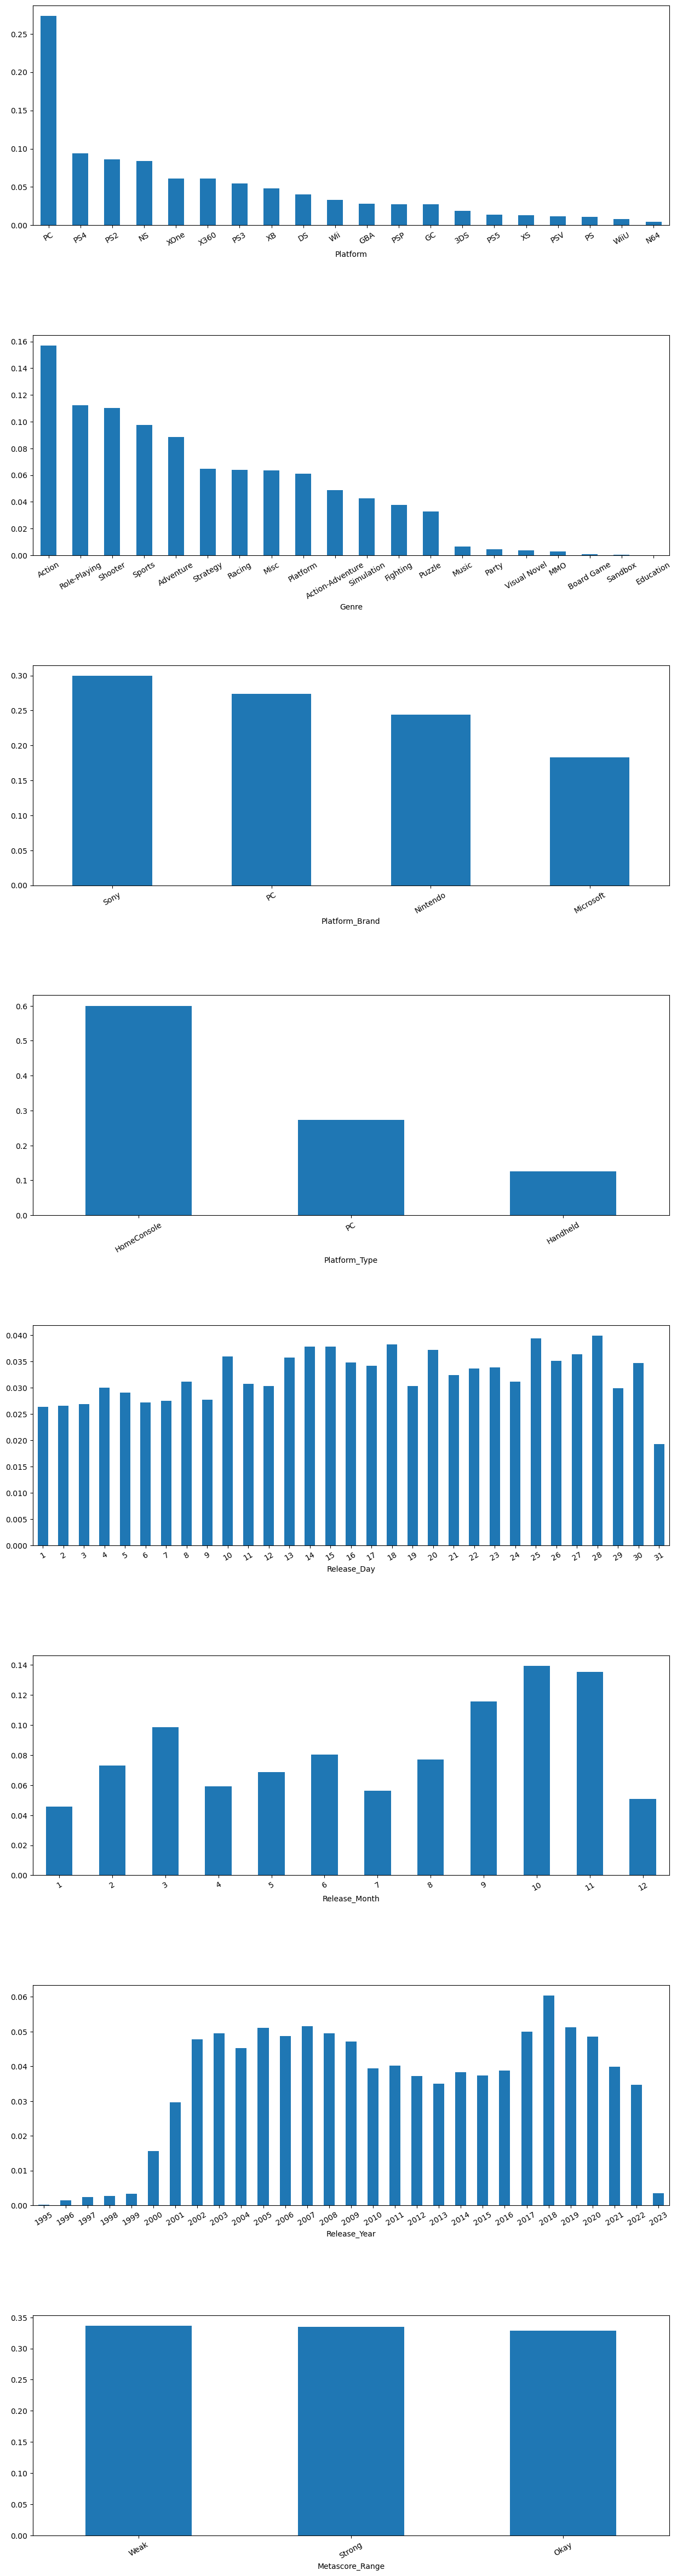

In [672]:
plt.subplots(8,1, figsize=(15,60))

pos = 1

for col in clean_df:

    if clean_df[col].nunique() < 50:
        plt.subplot(8,1, pos)
        if (col == 'Release_Day') or (col == 'Release_Year') or (col == 'Release_Month'):
            sorted_data = clean_df[col].value_counts(normalize=True).sort_index()

            sorted_data.plot(kind="bar")

        else:
            clean_df[col].value_counts(normalize=True).plot(kind="bar")
        pos += 1
        plt.xticks(rotation=30)
        
        
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)


plt.show()

For the other columns, there is too much data to be able to plot it.
I will use a type of vectorizingfor those columns.

Here's what I know for now, based on the visualizations above:

- Most common platform is PC, following by PS2, PS4 and X360.
    - I don't know how much the "platform" will help the model. Considering that I want the model to predict the ratings of future games, I doubt those platforms will be relevant.
- Most common genres are action, shooters and role-playing games.
    - Again, I know that games in those genres can range from really bad to really good, so i'm wondering if the model can find some connections between the genres and the platform brand/type and find coefficients.
- The number of rows for each platform brand is somewhat similar, 30-25-25-20.
- The number of rows of each platform type is a little different. Almost 60% is home console, while PC is around 22% and handheld is around 18%.
- The release day is pretty similar throughout the months.
- There seems to be a lot of games coming out in October and November, but very few games coming out in December and January.
- Since 2002, the number of game releases per year seems to be relatively similar. The fact that there are less games out in 2022, and no 2023 and 2024 games is due to the dataset being only until 2022.




For the next graphs, I want to do the same categories, but with the number of weak/okay/strong games in each category.

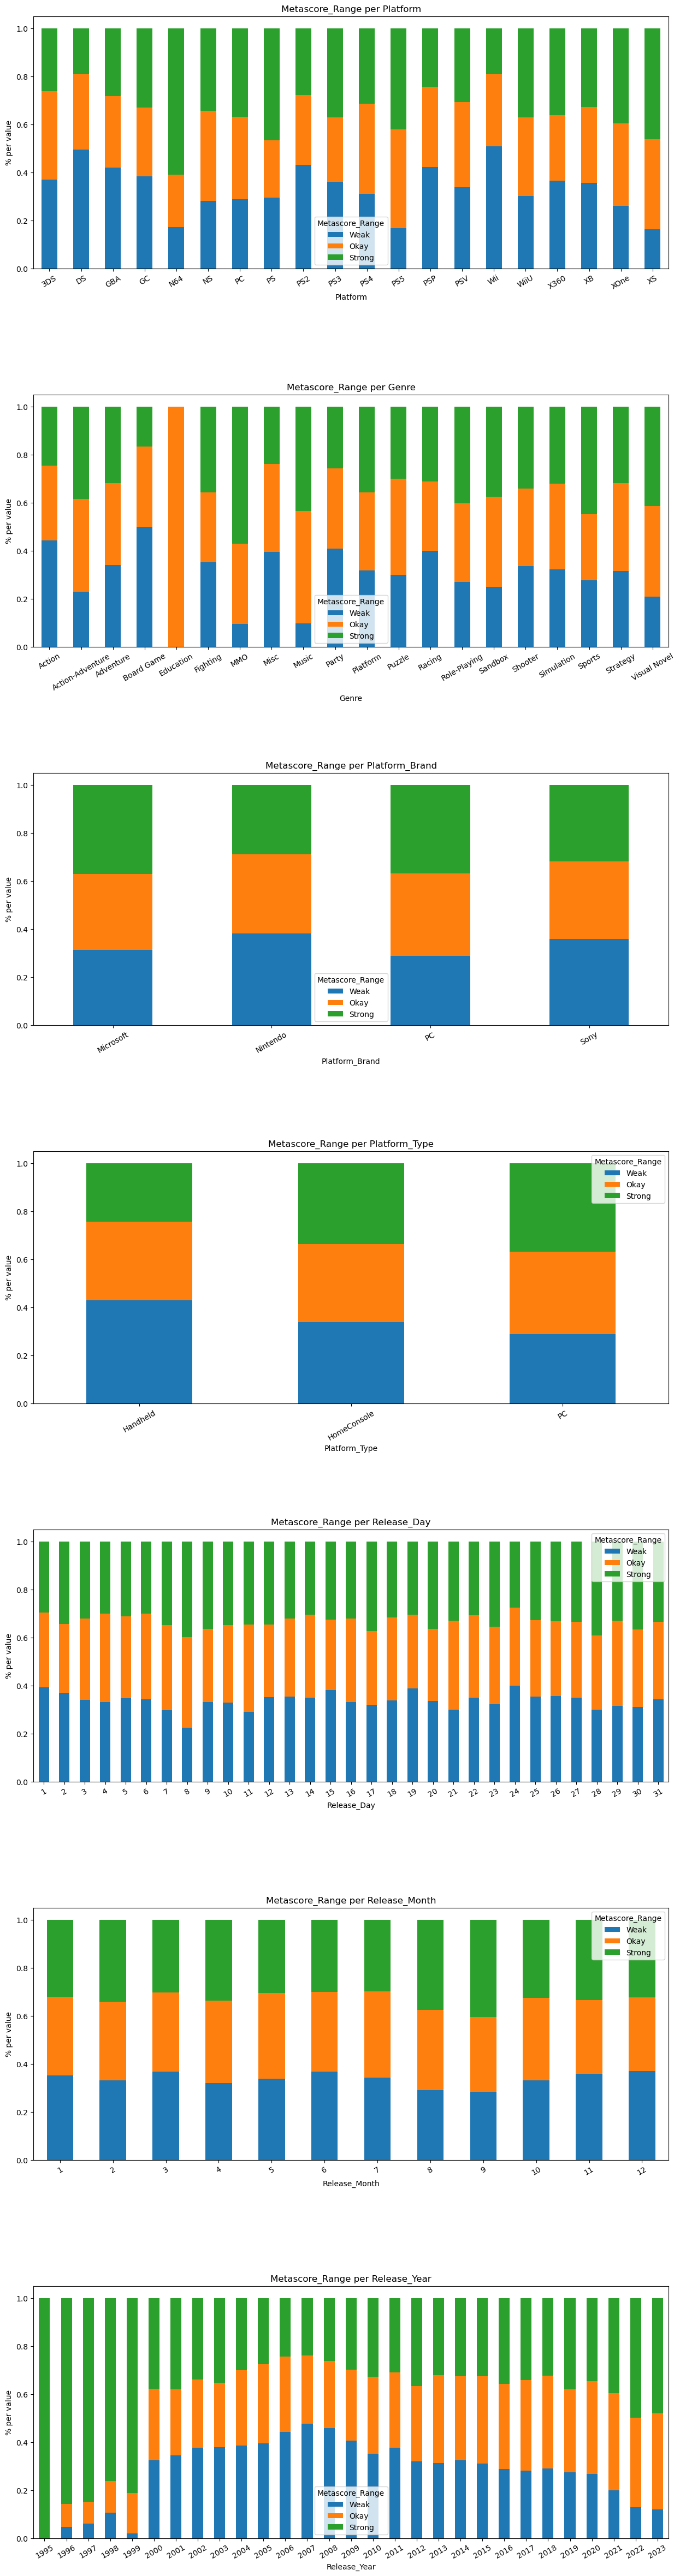

In [673]:

fig, axes = plt.subplots(7, 1, figsize=(15, 60))

pos = 0

# Iterate over each column in clean_df
for col in clean_df:
    if (clean_df[col].nunique() < 50) and (col != 'Metascore_Range'):
        
        # Group the data by the current column and 'another_column' and get counts
        grouped = clean_df.groupby([col, 'Metascore_Range']).size().unstack(fill_value=0)
        
        # Normalize each group to get the proportions
        normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
        
        # Plot the stacked bar chart
        normalized_grouped.plot(kind='bar', stacked=True, ax=axes[pos], rot=30)
        
        # Set title and labels
        axes[pos].set_title(f'Metascore_Range per {col}')
        axes[pos].set_ylabel('% per value')
        axes[pos].set_xlabel(col, )
        
        pos += 1

plt.subplots_adjust(hspace=0.5)
# plt.show()


### We can extract some more insights from the histograms above:

### Metascore range per Platform : <br>
- N64 had a lot of Strong-rated games. <br>
- Wii had a lot of Weak-rated games. <br>
- Current platforms, PS5 and Xbox Series, has very few “okay” games. <br>
- For the rest, relatively similar. <br>
<br>

### Metascore range per Genre <br>
- Education: No weak, no strong, only Okay-rated games. <br> 
- MMO, almost no Weak games and a lot of Strong games. <br>
- Board game, not a lot of strong games, a lot of okay games. <br>
<br>

### Metascore range per Platform_Brand <br>
- I was surprised to see that Nintendo has the biggest ratio of “Okay” games, and the lowest ratio of Strong games. I think it’s because they had a LOT of games on really good selling consoles and a lot of those games were bad. <br>
- For the 3 others, relatively similar results. <br>
<br>

### Metascore range per Platform_Type <br>
- Handheld has more than 40% of okay games, and only 22-23% of strong games. <br>
- PC has the best ratio with around 40% Strong games and around 25% okay games. <br>
- A lot of the time, handheld games are washed out version of bigger games. It easily disappoints people. <br>
<br>


### Metascore range per release_day or release_month <br>
- No observations here, fairly similar each day/month. <br>

### Metascore range per release year <br>
- The curve is similar to the number of games releasing per year. There is some correlation between the amount of games releasing in a year and the ratio of weak games during that year. <br>



As of right now, I think it is still too early to extract any more insights from this data.

I am satisfied with the current cleaning and database. I will export the csv and then continue in another notebook.

In [674]:
# exporting to csv when needed

clean_df.to_csv('clean_data_2.0.csv')

In [675]:
# if needed, to start from the csv

# merged_df = pd.read_csv('clean_data_1.5.csv', index_col=None, header=0)

<div id="heading--3"/>
    
# Next Steps

### As soon as possible:
    
    1. More cleaning of the dataset
    2. Trying to find a dataset to complement the sales number
    3. Filling the data on my own, to be able to make the predictions more accurate.

### In the next few weeks:

    4. Trying multiple types of regression models
    5. Finding the best model for the current situation
    6. Training the model for maximum efficiency
    7. Export a clean dataframe/CSV on Kaggle for other users
    8. Hosting the project on a website for easy utilization

The next steps will all be done in another notebook, to be able to start fresh and clean.

Thank you.

### Benjamin Lavoie (benjaminlavoie02@gmail.com)

### CapStone project: Gaming Score Forecasting Model

### Last update: March 14th, 2024 (version 2.0)

In [404]:
# making a version without focuses
# merged_df.drop(['Story Focus', 'Gameplay Focus', 'metascore'], axis=1, inplace=True)


merged_df.drop(['metascore'], axis=1, inplace=True)
# merged_df.dropna(subset=['Story Focus'], inplace=True)


# merged_df.drop(['Index'], axis=1, inplace=True)
merged_df.drop(['Name'], axis=1, inplace=True)
merged_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [405]:
# making a version without publishers/devs

# merged_df.drop(['Developer', 'Publisher'], axis=1, inplace=True)
# merged_df.drop(['DevSize', 'PublisherSize'], axis=1, inplace=True)

merged_df.drop(['Platform'], axis=1, inplace=True)
merged_df.drop(['Story Focus', 'Gameplay Focus'], axis=1, inplace=True)

# merged_df.drop(['PubOccurences', 'DevOccurences'], axis=1, inplace=True)

# merged_df.drop(['release_day', 'release_month', 'release_year'], axis=1, inplace=True)

In [406]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12538 entries, 0 to 12537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Publisher        12538 non-null  object 
 1   Developer        12538 non-null  object 
 2   Genre            12538 non-null  object 
 3   Platform_Brand   12538 non-null  object 
 4   Platform_Type    12538 non-null  object 
 5   release_day      12538 non-null  float64
 6   release_month    12538 non-null  float64
 7   release_year     12538 non-null  float64
 8   metascore_range  12538 non-null  object 
dtypes: float64(3), object(6)
memory usage: 881.7+ KB


In [407]:
# contingency_table = pd.crosstab(merged_df['Publisher'], merged_df['metascore_range'])
# chi2, p, dof, expected = chi2_contingency(contingency_table)
# results[feature] = {'Chi-Squared': chi2, 'p-value': p, 'dof' : dof}

# print(results)
# chi2_contingency(contingency_table)
# contingency_table

In [408]:
target_variable = 'metascore_range'

# Perform chi-squared test for each feature
results = {}
for feature in merged_df.columns:
    if feature != target_variable:
        contingency_table = pd.crosstab(merged_df[feature], merged_df[target_variable])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results[feature] = {'Chi-Squared': chi2, 'p-value': p, 'dof' : dof}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                Chi-Squared        p-value     dof
Publisher       3845.875843  3.429174e-148  1812.0
Developer       9856.405071  3.131192e-261  5428.0
Genre            407.869247   1.724733e-63    38.0
Platform_Brand   137.183372   3.937165e-27     6.0
Platform_Type    174.879117   9.378400e-37     4.0
release_day      105.874428   2.389688e-04    60.0
release_month     84.287264   3.151831e-09    22.0
release_year     546.623763   1.238485e-82    54.0


In [409]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12538 entries, 0 to 12537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Publisher        12538 non-null  object 
 1   Developer        12538 non-null  object 
 2   Genre            12538 non-null  object 
 3   Platform_Brand   12538 non-null  object 
 4   Platform_Type    12538 non-null  object 
 5   release_day      12538 non-null  float64
 6   release_month    12538 non-null  float64
 7   release_year     12538 non-null  float64
 8   metascore_range  12538 non-null  object 
dtypes: float64(3), object(6)
memory usage: 881.7+ KB


In [410]:
df_numerical = merged_df.copy()
df_numerical.select_dtypes('object').columns
df_numerical.drop(['metascore_range'], axis=1, inplace=True)
df_dummy = pd.get_dummies(df_numerical, dtype=np.int32 )
df_dummy['metascore_range'] = merged_df['metascore_range']


# df_numerical = merged_df.copy()
# df_numerical.select_dtypes('object').columns
# df_numerical.drop(['Name', 'userscore', 'critic_reviews', 'metascore',
#                   'user_reviews', 'score', 'opencritic_classification',
#                    'esrb_rating', 'global_sales_range'], axis=1, inplace=True)
# df_dummy = pd.get_dummies(df_numerical, dtype=np.int32 )
# df_dummy['global_sales_range'] = merged_df['global_sales_range']

In [411]:
df_numerical

,Publisher,Developer,Genre,Platform_Brand,Platform_Type,release_day,release_month,release_year
0,Nintendo,Nintendo EAD,Sports,Nintendo,HomeConsole,19.0,11.0,2006.0
1,Nintendo,Nintendo EPD,Racing,Nintendo,HomeConsole,28.0,4.0,2017.0
2,Valve,Valve Corporation,Shooter,PC,PC,10.0,10.0,2007.0
3,Valve,Valve Corporation,Shooter,PC,PC,21.0,8.0,2012.0
4,Valve,Valve Corporation,Shooter,PC,PC,23.0,10.0,2015.0
...,...,...,...,...,...,...,...,...
12533,Zen Studios,Unknown,Misc,Nintendo,Handheld,28.0,6.0,2012.0
12534,Zen Studios,Zen Studios,Sports,Nintendo,HomeConsole,3.0,8.0,2017.0
12535,Zen Studios,Zen Studios,Sports,Sony,HomeConsole,25.0,7.0,2017.0
12536,Zombie Cow Studios,Zombie Cow Studios,Adventure,PC,PC,2.0,7.0,2009.0


In [412]:
df_dummy.head()

,release_day,release_month,release_year,Publisher_04-Aug,Publisher_10TACLE Studios,Publisher_10tons Ltd,Publisher_11 bit studios,Publisher_17-Bit,Publisher_1C Company,Publisher_2Awesome Studio,...,Genre_Strategy,Genre_Visual Novel,Platform_Brand_Microsoft,Platform_Brand_Nintendo,Platform_Brand_PC,Platform_Brand_Sony,Platform_Type_Handheld,Platform_Type_HomeConsole,Platform_Type_PC,metascore_range
0,19.0,11.0,2006.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,Okay
1,28.0,4.0,2017.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,Strong
2,10.0,10.0,2007.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Strong
3,21.0,8.0,2012.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Strong
4,23.0,10.0,2015.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Strong


In [413]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12538 entries, 0 to 12537
Columns: 3653 entries, release_day to metascore_range
dtypes: float64(3), int32(3649), object(1)
memory usage: 174.9+ MB


In [414]:
df_dummy.isna().sum().sum()

0

In [415]:
# Way too many columns. Which column is making so many dummy columns?
# Let's check

for column in df_numerical:
    print(f'The column {column} has {df_numerical[column].nunique()} unique values')


The column Publisher has 907 unique values
The column Developer has 2715 unique values
The column Genre has 20 unique values
The column Platform_Brand has 4 unique values
The column Platform_Type has 3 unique values
The column release_day has 31 unique values
The column release_month has 12 unique values
The column release_year has 28 unique values


In [416]:
# The first time I ran this, here is what I got:

# The column Platform has 21 unique values
# The column Publisher has 914 unique values
# The column Developer has 2725 unique values
# The column Global_Sales has 619 unique values
# The column Genre has 20 unique values
# The column Platform_Brand has 4 unique values
# The column Platform_Type has 3 unique values
# The column release_date has 3729 unique values
# The column esrb_rating has 7 unique values
# The column metascore has 82 unique values
# The column userscore has 90 unique values
# The column critic_reviews has 114 unique values
# The column user_reviews has 1339 unique values
# The column num_players has 331 unique values
# The column Story Focus has 2 unique values
# The column Gameplay Focus has 2 unique values
# The column Series has 2 unique values
# The column BrandedName has 1 unique values
# The column score has 73 unique values
# The column opencritic_classification has 4 unique values

# I will check the publisher and developers the most.
# I should also check num_players

In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


In [419]:
# first test ever

X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)



# 1. Instantiate model
videogames_logit = HistGradientBoostingClassifier()

# 2. Fit model
videogames_logit.fit(X_train, y_train);


print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
print(f'Score on test: {videogames_logit.score(X_test, y_test)}')

Score on train: 0.7396713989472005
Score on test: 0.4935396394959324


In [420]:
# # first test ever

X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)



# 1. Instantiate model
videogames_logit = RandomForestClassifier(max_depth = 5, max_features = 1000)

# 2. Fit model
videogames_logit.fit(X_train, y_train);


print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
print(f'Score on test: {videogames_logit.score(X_test, y_test)}')

Score on train: 0.478704737597703
Score on test: 0.4287765193810815


In [421]:
# first test ever

X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



# 1. Instantiate model
videogames_logit = AdaBoostClassifier(n_estimators=20)

# 2. Fit model
videogames_logit.fit(X_train, y_train);


print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
print(f'Score on test: {videogames_logit.score(X_test, y_test)}')

Score on train: 0.447926162260711
Score on test: 0.44072301967038807


In [422]:
# first test ever

X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)



# 1. Instantiate model
videogames_logit = BaggingClassifier()

# 2. Fit model
myregression_results = videogames_logit.fit(X_train, y_train);

print(myregression_results.get_params())


print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
print(f'Score on test: {videogames_logit.score(X_test, y_test)}')

{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Score on train: 0.9794225554314883
Score on test: 0.4988036369436912


In [423]:
from sklearn.preprocessing import StandardScaler

x = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


my_logreg_model =BaggingClassifier().fit(X_train, y_train)

scaler = StandardScaler()
scaler.fit(X_train)  #NOTICE THAT WE DON"T EVEN FIT the scaler on our TEST DATA!
X_scaled_train = scaler.transform(X_train)

X_scaled_test = scaler.transform(X_test)

my_logreg_model_scaled = BaggingClassifier().fit(X_scaled_train, y_train)

print(my_logreg_model.score(X_test,y_test))
print(my_logreg_model_scaled.score(X_scaled_test,y_test))

0.5462519936204147
0.5283094098883573


In [424]:
#test:

X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

y.value_counts()

metascore_range
Strong    4247
Weak      4189
Okay      4102
Name: count, dtype: int64

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

credit_logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=10000)

# 2. Fit model
credit_logit.fit(X_train, y_train)

print(f'Score on train: {credit_logit.score(X_train, y_train)}')
print(f'Score on test: {credit_logit.score(X_test, y_test)}')

Score on train: 0.6457383773928898
Score on test: 0.5345560871876661


In [428]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [429]:
# Get class predictions
y_pred = credit_logit.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predict 1", "2", "3"],
    index=["True 1", "2", "3"]
)

display(cf_df)

,Predict 1,2,3
True 1,496,376,375
2,286,819,182
3,309,223,696


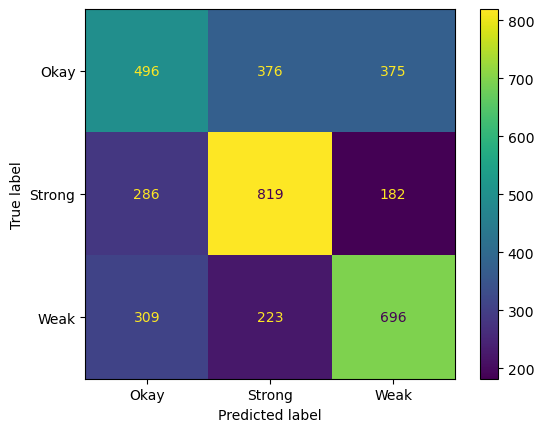

In [430]:
ConfusionMatrixDisplay.from_estimator(credit_logit, X_test, y_test)

In [431]:
display(cf_df)

,Predict 1,2,3
True 1,496,376,375
2,286,819,182
3,309,223,696


In [432]:
tp = cf_matrix[2, 2]
predicted_fraud = cf_matrix[:, 2].sum()

precision = tp/predicted_fraud

print(f"Precision = {tp}/{predicted_fraud} = {round(precision*100, 2)}%")

Precision = 696/1253 = 55.55%


In [433]:
tp = cf_matrix[1, 1]
true_fraud = cf_matrix[1, :].sum()

recall = tp/true_fraud

print(f"Recall = {tp}/{true_fraud} = {round(recall*100, 2)}%")

Recall = 819/1287 = 63.64%


In [434]:

# from sklearn.feature_selection import RFECV



# X = df_dummy.drop(columns="metascore_range")
# y = df_dummy["metascore_range"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create a logistic regression classifier
# clf = RandomForestClassifier()

# # Create RFE with cross-validation
# rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')

# # Fit RFE to training data
# rfecv.fit(X_train, y_train)

# # Get selected features
# selected_features = np.where(rfecv.support_ == True)[0]

# # Print selected features
# print("Selected Features:")
# for feature_idx in selected_features:
#     print(f"Feature {feature_idx + 1}")

# # Plot number of features vs. cross-validation scores
# import matplotlib.pyplot as plt
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross-validation score (accuracy)")
# plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
# plt.show()

In [435]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [437]:
# X = df_dummy.drop(columns="metascore_range")
# y = df_dummy["metascore_range"]

# i = 0.1

# while i < 0.95:
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)



#     # 1. Instantiate model
#     videogames_logit = GradientBoostingClassifier()

#     # 2. Fit model
#     videogames_logit.fit(X_train, y_train);


#     print(f'i is currently {i}')
#     print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
#     print(f'Score on test: {videogames_logit.score(X_test, y_test)}')
#     i += 0.1

In [438]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [439]:
X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

i = 0.1

while i < 0.95:

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = i)

    # 1. Instantiate model
    videogames_logit = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_encoded)))

    # 2. Fit model
    videogames_logit.fit(X_train, y_train);

    print(f'i is currently {i}')
    print(f'Score on train: {videogames_logit.score(X_train, y_train)}')
    print(f'Score on test: {videogames_logit.score(X_test, y_test)}')
    i += 0.1
    

i is currently 0.1
Score on train: 0.6489719957461892
Score on test: 0.5374800637958532
i is currently 0.2
Score on train: 0.6571286141575274
Score on test: 0.5446570972886763
i is currently 0.30000000000000004
Score on train: 0.6700091157702825
Score on test: 0.5358851674641149
i is currently 0.4
Score on train: 0.6785429407072587
Score on test: 0.52811004784689
i is currently 0.5
Score on train: 0.6769819747966183
Score on test: 0.5157122348061892
i is currently 0.6
Score on train: 0.6975074775672981
Score on test: 0.5130931809118703
i is currently 0.7
Score on train: 0.7170965168838075
Score on test: 0.49003076221943714
i is currently 0.7999999999999999
Score on train: 0.751495811727164
Score on test: 0.474728342139368
i is currently 0.8999999999999999
Score on train: 0.8786911412609737
Score on test: 0.43393885688967654


In [440]:
X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.37      0.41      1369
           1       0.56      0.61      0.59      1378
           2       0.55      0.62      0.58      1391

    accuracy                           0.53      4138
   macro avg       0.53      0.53      0.53      4138
weighted avg       0.53      0.53      0.53      4138



In [442]:
X = df_dummy.drop(columns="metascore_range")
y = df_dummy["metascore_range"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split( X, y_encoded,
                                                    test_size=0.4, stratify = y_encoded)

xgb_model = XGBClassifier()
ab_model = AdaBoostClassifier()
rf_model = RandomForestClassifier()
nn_model = MLPClassifier(hidden_layer_sizes=(5,5,5,5))

xgb_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

print("Test Set Scores:")
print(f"AdaBoost score: {ab_model.score(X_test, y_test)}")
print(f"Random Forest score: {rf_model.score(X_test, y_test)}")
print(f"XG Boost score: {xgb_model.score(X_test, y_test)}")
print(f"NN Boost score: {nn_model.score(X_test, y_test)}")

Test Set Scores:
AdaBoost score: 0.4728867623604466
Random Forest score: 0.543859649122807
XG Boost score: 0.5330940988835726
NN Boost score: 0.3387161084529506
